In [1]:
import librosa
import librosa.display
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import joblib
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from skimage.filters import sobel
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy
import warnings
warnings.filterwarnings('ignore')

In [2]:
sampling_rate = 44100  
n_fft = 2048  
hop_length = 512  
n_mfcc = 13  

### STFT + MFCC

In [3]:
sampling_rate = 44100  
n_fft = 2048  
hop_length = 512 
n_mfcc = 13  

features = []

commands = ["one", "two", "three", "four", "five", "grab", "release"]
for command in commands:
    command_features = []

    for i in range(400):
        filename = f"C:/AWC_Dataset/audio_files_preprocessed/{command}/{command}_{i}.wav"  # Adjust the filename pattern as per your file naming convention
        
        print("Processing:", filename) 

        audio, _ = librosa.load(filename, sr=sampling_rate)

        stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

        mfcc = librosa.feature.mfcc(S=librosa.power_to_db(stft), n_mfcc=n_mfcc)

        mfcc_flat = mfcc.flatten()

        command_features.append(mfcc_flat)

    features.append(command_features)

features = np.array(features)

n_samples = features.shape[0] * features.shape[1]
n_features = features.shape[2]
features = features.reshape((n_samples, n_features))

Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_0.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_1.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_2.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_3.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_4.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_5.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_6.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_7.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_8.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_9.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_10.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_11.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_12.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_13.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_14.wav
Proce

Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_128.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_129.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_130.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_131.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_132.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_133.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_134.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_135.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_136.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_137.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_138.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_139.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_140.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_141.wav
Processing: C:/AWC_Dataset/audio_files_preproces

Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_250.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_251.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_252.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_253.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_254.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_255.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_256.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_257.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_258.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_259.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_260.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_261.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_262.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_263.wav
Processing: C:/AWC_Dataset/audio_files_preproces

Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_371.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_372.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_373.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_374.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_375.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_376.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_377.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_378.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_379.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_380.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_381.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_382.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_383.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/one/one_384.wav
Processing: C:/AWC_Dataset/audio_files_preproces

Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_93.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_94.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_95.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_96.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_97.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_98.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_99.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_100.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_101.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_102.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_103.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_104.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_105.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_106.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two

Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_216.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_217.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_218.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_219.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_220.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_221.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_222.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_223.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_224.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_225.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_226.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_227.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_228.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_229.wav
Processing: C:/AWC_Dataset/audio_files_preproces

Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_337.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_338.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_339.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_340.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_341.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_342.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_343.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_344.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_345.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_346.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_347.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_348.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_349.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/two/two_350.wav
Processing: C:/AWC_Dataset/audio_files_preproces

Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_56.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_57.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_58.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_59.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_60.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_61.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_62.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_63.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_64.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_65.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_66.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_67.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_68.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_69.wav
Proces

Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_171.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_172.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_173.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_174.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_175.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_176.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_177.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_178.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_179.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_180.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_181.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_182.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_183.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_

Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_285.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_286.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_287.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_288.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_289.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_290.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_291.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_292.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_293.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_294.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_295.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_296.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_297.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_

Processing: C:/AWC_Dataset/audio_files_preprocessed/three/three_399.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_0.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_1.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_2.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_3.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_4.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_5.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_6.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_7.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_8.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_9.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_10.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_11.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_12.wav
Processing: C:/AWC_Dataset/audio_files_pr

Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_119.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_120.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_121.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_122.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_123.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_124.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_125.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_126.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_127.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_128.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_129.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_130.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_131.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_132.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_237.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_238.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_239.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_240.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_241.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_242.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_243.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_244.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_245.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_246.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_247.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_248.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_249.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_250.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_355.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_356.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_357.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_358.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_359.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_360.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_361.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_362.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_363.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_364.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_365.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_366.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_367.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/four/four_368.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_74.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_75.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_76.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_77.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_78.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_79.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_80.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_81.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_82.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_83.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_84.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_85.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_86.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_87.wav
Processing: C:/AWC_Dataset/audio_f

Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_193.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_194.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_195.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_196.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_197.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_198.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_199.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_200.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_201.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_202.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_203.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_204.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_205.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_206.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_311.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_312.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_313.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_314.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_315.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_316.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_317.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_318.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_319.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_320.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_321.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_322.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_323.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/five/five_324.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_31.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_32.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_33.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_34.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_35.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_36.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_37.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_38.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_39.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_40.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_41.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_42.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_43.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_44.wav
Processing: C:/AWC_Dataset/audio_f

Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_152.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_153.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_154.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_155.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_156.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_157.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_158.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_159.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_160.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_161.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_162.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_163.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_164.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_165.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_270.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_271.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_272.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_273.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_274.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_275.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_276.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_277.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_278.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_279.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_280.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_281.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_282.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_283.wav
Processing: C:/AWC_D

Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_388.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_389.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_390.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_391.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_392.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_393.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_394.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_395.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_396.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_397.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_398.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/grab/grab_399.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_0.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_1.wav
Processing: 

Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_100.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_101.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_102.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_103.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_104.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_105.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_106.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_107.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_108.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_109.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_110.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_111.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_112.wav
Processing: 

Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_209.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_210.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_211.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_212.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_213.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_214.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_215.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_216.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_217.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_218.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_219.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_220.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_221.wav
Processing: 

Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_319.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_320.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_321.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_322.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_323.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_324.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_325.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_326.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_327.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_328.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_329.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_330.wav
Processing: C:/AWC_Dataset/audio_files_preprocessed/release/release_331.wav
Processing: 

In [4]:
features

array([[-1.1684187e+03, -1.1220801e+03, -1.1397529e+03, ...,
         1.9056081e+00,  3.4373159e+00,  5.0492392e+00],
       [-1.1574083e+03, -1.1112649e+03, -1.1122894e+03, ...,
         2.6217093e+00,  5.2891874e+00,  8.8354969e+00],
       [-1.1563352e+03, -1.1080356e+03, -1.1274924e+03, ...,
        -1.1068863e+01, -7.9842424e+00, -1.7725236e+00],
       ...,
       [-1.1547443e+03, -1.1081117e+03, -1.1200969e+03, ...,
         1.7208114e+00,  4.6439981e+00,  5.9236236e+00],
       [-1.1570819e+03, -1.1084446e+03, -1.1182360e+03, ...,
         6.4559803e+00,  4.9622278e+00,  5.6745329e+00],
       [-1.1792152e+03, -1.1312587e+03, -1.1305326e+03, ...,
        -1.1378022e+00,  6.4089146e+00,  8.6197720e+00]], dtype=float32)

In [5]:
df = pd.DataFrame(features)

labels = ["one", "two", "three", "four", "five", "grab", "release"]
df['label'] = np.repeat(labels, 400)

csv_data= df.to_csv(r'C:/AWC_Dataset/STFT_MFCC_Final.csv'.format(i), mode='a', index=False)

In [6]:
df

0            1            2            3            4  \
0    -1168.418701 -1122.080078 -1139.752930 -1132.812988 -1135.229980   
1    -1157.408325 -1111.264893 -1112.289429 -1106.264038 -1108.446045   
2    -1156.335205 -1108.035645 -1127.492432 -1126.115234 -1125.800537   
3    -1151.472412 -1101.170288 -1118.937378 -1117.805786 -1114.789307   
4    -1157.470459 -1108.469360 -1109.487671 -1109.185669 -1111.401489   
...           ...          ...          ...          ...          ...   
2795 -1162.878052 -1121.500732 -1123.105103 -1120.749023 -1114.404297   
2796 -1004.454468  -953.288940 -1026.129517 -1094.305908 -1094.273438   
2797 -1154.744263 -1108.111694 -1120.096924 -1120.144165 -1118.439087   
2798 -1157.081909 -1108.444580 -1118.235962 -1115.286621 -1119.164307   
2799 -1179.215210 -1131.258667 -1130.532593 -1122.722656 -1122.209839   

                5            6            7            8            9  ...  \
0    -1141.615967 -1124.575562 -1133.644897 -1123.113281 -1132.144897  ...   
1    -1113.973267 -1103.499268 -1115.533203 -1108.983643 -1120.943726  ...   
2    -1137.253418 -1116.183350 -1123.034302 -1114.084351 -1126.922119  ...   
3    -1125.216309 -1121.566284 -1119.868042 -1109.763062 -1120.420654  ...   
4    -1118.791992 -1102.193848 -1117.773315 -1115.610474 -1122.066650  ...   
...           ...          ...          ...          ...          ...  ...   
2795 -1122.675659 -1120.641113 -1122.714478 -1110.108032 -1118.899048  ...   
2796 -1103.050659 -1087.870483 -1103.543091 -1097.664429 -1102.219116  ...   
2797 -1128.079102 -1113.532104 -1116.166992 -1106.202515 -1117.881714  ...   
2798 -1131.257324 -1125.102905 -1120.545166 -1113.624390 -1117.647217  ...   
2799 -1125.978149 -1108.051758 -1118.920288 -1111.369385 -1117.477905  ...   

           2617       2618      2619      2620       2621       2622  \
0      9.303310   6.831110 -0.265928 -1.591431   0.359965   6.287081   
1      9.743456  12.333566  6.593281  8.566092   5.467621   6.424336   
2     -4.086229  -1.684008 -3.435968 -9.819376  -4.469286  -6.669065   
3      5.496246   3.664325  8.222122  8.152088  14.435328  13.735077   
4      9.979181   4.789193 -1.557154 -0.470257   4.195799   3.868409   
...         ...        ...       ...       ...        ...        ...   
2795  15.402908   8.672585 -6.471672 -7.008921   3.775558   8.456908   
2796  14.385376  11.804174  9.735641  8.812810   8.596671  16.394360   
2797   5.857870   9.662210  3.611826  3.280480   3.281755   1.732094   
2798   7.433251   6.917005  5.768800  1.107254   9.525029   7.313147   
2799  15.156504   5.925607  1.623086  2.047086   5.218459   3.462007   

           2623       2624       2625    label  
0      1.905608   3.437316   5.049239      one  
1      2.621709   5.289187   8.835497      one  
2    -11.068863  -7.984242  -1.772524      one  
3     12.002222  10.267292  12.223062      one  
4      3.522255   8.296127  12.295274      one  
...         ...        ...        ...      ...  
2795   3.734952   8.342342   9.798124  release  
2796   7.211840   3.302277   4.671463  release  
2797   1.720811   4.643998   5.923624  release  
2798   6.455980   4.962228   5.674533  release  
2799  -1.137802   6.408915   8.619772  release  

[2800 rows x 2627 columns]

In [7]:
X = df.iloc[:, :-1]  # selects all rows (:) and all but the last column (:-1) of the DataFrame df.
Y = df.iloc[:, -1]    #  selects all rows (:) and the last column (-1) of the DataFrame df.

# train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=5)

In [8]:
X

0            1            2            3            4     \
0    -1168.418701 -1122.080078 -1139.752930 -1132.812988 -1135.229980   
1    -1157.408325 -1111.264893 -1112.289429 -1106.264038 -1108.446045   
2    -1156.335205 -1108.035645 -1127.492432 -1126.115234 -1125.800537   
3    -1151.472412 -1101.170288 -1118.937378 -1117.805786 -1114.789307   
4    -1157.470459 -1108.469360 -1109.487671 -1109.185669 -1111.401489   
...           ...          ...          ...          ...          ...   
2795 -1162.878052 -1121.500732 -1123.105103 -1120.749023 -1114.404297   
2796 -1004.454468  -953.288940 -1026.129517 -1094.305908 -1094.273438   
2797 -1154.744263 -1108.111694 -1120.096924 -1120.144165 -1118.439087   
2798 -1157.081909 -1108.444580 -1118.235962 -1115.286621 -1119.164307   
2799 -1179.215210 -1131.258667 -1130.532593 -1122.722656 -1122.209839   

             5            6            7            8            9     ...  \
0    -1141.615967 -1124.575562 -1133.644897 -1123.113281 -1132.144897  ...   
1    -1113.973267 -1103.499268 -1115.533203 -1108.983643 -1120.943726  ...   
2    -1137.253418 -1116.183350 -1123.034302 -1114.084351 -1126.922119  ...   
3    -1125.216309 -1121.566284 -1119.868042 -1109.763062 -1120.420654  ...   
4    -1118.791992 -1102.193848 -1117.773315 -1115.610474 -1122.066650  ...   
...           ...          ...          ...          ...          ...  ...   
2795 -1122.675659 -1120.641113 -1122.714478 -1110.108032 -1118.899048  ...   
2796 -1103.050659 -1087.870483 -1103.543091 -1097.664429 -1102.219116  ...   
2797 -1128.079102 -1113.532104 -1116.166992 -1106.202515 -1117.881714  ...   
2798 -1131.257324 -1125.102905 -1120.545166 -1113.624390 -1117.647217  ...   
2799 -1125.978149 -1108.051758 -1118.920288 -1111.369385 -1117.477905  ...   

           2616       2617       2618      2619      2620       2621  \
0      7.121711   9.303310   6.831110 -0.265928 -1.591431   0.359965   
1     12.890520   9.743456  12.333566  6.593281  8.566092   5.467621   
2     -1.828234  -4.086229  -1.684008 -3.435968 -9.819376  -4.469286   
3      9.140434   5.496246   3.664325  8.222122  8.152088  14.435328   
4     12.778470   9.979181   4.789193 -1.557154 -0.470257   4.195799   
...         ...        ...        ...       ...       ...        ...   
2795  15.001236  15.402908   8.672585 -6.471672 -7.008921   3.775558   
2796  17.034367  14.385376  11.804174  9.735641  8.812810   8.596671   
2797  11.475950   5.857870   9.662210  3.611826  3.280480   3.281755   
2798   6.397832   7.433251   6.917005  5.768800  1.107254   9.525029   
2799   8.750198  15.156504   5.925607  1.623086  2.047086   5.218459   

           2622       2623       2624       2625  
0      6.287081   1.905608   3.437316   5.049239  
1      6.424336   2.621709   5.289187   8.835497  
2     -6.669065 -11.068863  -7.984242  -1.772524  
3     13.735077  12.002222  10.267292  12.223062  
4      3.868409   3.522255   8.296127  12.295274  
...         ...        ...        ...        ...  
2795   8.456908   3.734952   8.342342   9.798124  
2796  16.394360   7.211840   3.302277   4.671463  
2797   1.732094   1.720811   4.643998   5.923624  
2798   7.313147   6.455980   4.962228   5.674533  
2799   3.462007  -1.137802   6.408915   8.619772  

[2800 rows x 2626 columns]

In [9]:
Y

0           one
1           one
2           one
3           one
4           one
         ...   
2795    release
2796    release
2797    release
2798    release
2799    release
Name: label, Length: 2800, dtype: object

In [10]:
x_train

0            1            2            3            4     \
2698 -1155.558594 -1105.669556 -1115.433472 -1113.805298 -1104.209229   
589   -908.574768  -846.483704  -814.733032  -782.397949  -780.565491   
208  -1116.285645 -1058.766968 -1064.339233 -1059.761963 -1058.596802   
1246 -1072.534302 -1016.749329 -1022.668945 -1018.598328 -1011.921692   
72   -1051.388428  -993.179626 -1014.585815 -1015.318054  -998.804443   
...           ...          ...          ...          ...          ...   
1032 -1084.348145 -1026.162109 -1042.940430 -1044.658447 -1038.343872   
2121 -1130.550781 -1075.277710 -1077.008667 -1069.823242 -1065.548950   
1424 -1180.928589 -1138.522339 -1155.583252 -1159.205811 -1152.171753   
1725 -1132.293091 -1080.698730 -1089.306885 -1085.037842 -1092.736816   
2254  -812.128357  -853.705811  -949.921753  -952.956909  -958.351135   

             5            6            7            8            9     ...  \
2698 -1116.065796 -1107.991821 -1117.196411 -1113.574341 -1125.189819  ...   
589   -785.840576  -770.600586  -749.153137  -797.875305  -830.282654  ...   
208  -1071.034424 -1058.539307 -1074.348633 -1064.037598 -1062.754639  ...   
1246 -1022.191467 -1010.589722 -1025.692749 -1018.593018 -1021.063965  ...   
72   -1011.500549 -1004.141663 -1013.553406 -1001.888184 -1002.851135  ...   
...           ...          ...          ...          ...          ...  ...   
1032 -1047.682129 -1033.682251 -1042.371582 -1037.548584 -1039.955933  ...   
2121 -1067.015869 -1052.559692 -1064.477295 -1051.969360 -1065.069702  ...   
1424 -1153.271240 -1140.001831 -1147.093140 -1142.436890 -1151.729126  ...   
1725 -1102.103027 -1084.839111 -1094.978760 -1086.554688 -1088.499878  ...   
2254  -977.469055  -975.797302  -998.486023  -995.450989 -1015.653748  ...   

           2616       2617       2618       2619       2620       2621  \
2698  13.479671  12.040350   8.155579   2.371520   7.628201  10.542685   
589    7.974173   6.091221   3.389312   2.110880   1.485866   3.757097   
208    3.179423   8.029606   5.740521  -2.299851  -0.321106  -0.403036   
1246  24.815186  23.411058  19.487034  13.855988  10.212745  10.396761   
72     4.264916   7.770340   5.880830   8.352627   6.985401   4.886111   
...         ...        ...        ...        ...        ...        ...   
1032  -3.403292   3.390883   3.843638   0.985971   0.274696   4.073394   
2121   6.372525   4.667471  -2.459074   3.161480   5.650075   3.830490   
1424   9.134774   8.262329  10.541353   1.081369  -3.638392  -1.237486   
1725  19.702887  15.987572  13.905804  -1.320197  -1.862897   2.485035   
2254   1.621570   5.282745   8.585744  -0.113092  -4.780592  -3.269149   

           2622       2623       2624       2625  
2698   9.382782  -1.939514  -2.845994   0.522934  
589    4.959617  13.505268  14.328180  16.203051  
208    0.805737  -6.341512  -8.317694  -5.656914  
1246  11.828912   8.206380   2.323433   4.045012  
72     2.597113   2.584157  -3.381625  -0.053410  
...         ...        ...        ...        ...  
1032  -0.251158  -4.870237   0.664428   3.966120  
2121   8.641186  15.099491   8.790676   6.361414  
1424   3.610855   0.916769   6.482071  14.652954  
1725   2.806735   3.638347   4.652123   6.770350  
2254  -2.102835   3.891129  -0.604503   9.156828  

[2240 rows x 2626 columns]

In [11]:
x_test

0            1            2            3            4     \
2114 -1161.776123 -1112.462158 -1124.126709 -1127.786255 -1120.711670   
883  -1098.777344 -1045.602417 -1055.052490 -1054.940430 -1041.940552   
115  -1047.626465  -989.686401 -1009.151855 -1009.569092  -998.208435   
12   -1159.643677 -1110.739502 -1123.790771 -1120.477661 -1114.499023   
430  -1057.175415  -999.672424 -1011.802124 -1012.008179 -1001.413147   
...           ...          ...          ...          ...          ...   
767  -1028.598633  -968.474670  -987.989502  -988.023865  -988.654785   
71   -1037.093628  -992.099304  -998.639160  -997.092896  -992.380127   
2522 -1000.458984  -950.759338  -972.473816  -971.109314  -975.468567   
2348  -762.538330  -798.802490  -880.243713  -892.166077  -901.338867   
2675 -1157.138672 -1108.147461 -1118.065308 -1118.752930 -1123.395630   

             5            6            7            8            9     ...  \
2114 -1125.088379 -1114.588623 -1123.805542 -1114.251709 -1122.652100  ...   
883  -1051.178345 -1040.146362 -1048.595703 -1037.438843 -1055.353271  ...   
115  -1013.405701 -1006.781311 -1014.312134 -1001.379211 -1006.722473  ...   
12   -1127.232788 -1115.499023 -1128.116211 -1119.227295 -1125.117554  ...   
430  -1008.539673 -1000.972961 -1017.602234 -1007.377319 -1005.608398  ...   
...           ...          ...          ...          ...          ...  ...   
767   -999.539001  -988.444458 -1001.476501  -989.334412 -1004.020569  ...   
71    -992.385925  -979.333740  -999.612610  -993.899353 -1004.670654  ...   
2522  -986.513123  -985.127075 -1003.249878  -992.591431 -1003.672913  ...   
2348  -923.565613  -905.768982  -923.356567  -913.263611  -934.799194  ...   
2675 -1129.445068 -1116.253296 -1125.031494 -1123.041626 -1125.826660  ...   

           2616       2617       2618       2619       2620       2621  \
2114   3.531812   4.527705   5.952266  10.243117   4.279506  12.652100   
883    2.767607  -3.461611  -6.329587  -1.118028  -2.381355   8.060663   
115    1.982246   7.363204   2.816058   1.434202   5.317637   5.254473   
12     9.868057  14.099241   6.233244   4.189857   2.812406   9.692760   
430   18.085752  13.545283   9.026722   7.713365   3.181022   1.767163   
...         ...        ...        ...        ...        ...        ...   
767   10.470512  13.964362  16.079174   7.448678   4.290291   4.567471   
71     3.041657   7.274872   7.150513   0.873158   1.882783  -5.345195   
2522   3.808111   5.675415   1.490895  -0.255989   4.857414   7.479805   
2348  11.584621   9.341764   3.535666   8.312190   8.639889   7.878334   
2675  22.483406  19.897573  16.127455  12.257292  12.971838   4.966886   

           2622      2623       2624       2625  
2114  10.643343  5.095907   2.334692   5.708920  
883    8.598267  0.131614   0.291715  -1.435586  
115    3.415850  1.379878   9.059361  12.618401  
12    11.350905  8.855590   9.409119  14.236865  
430   -0.550647 -0.535460   0.897249   8.015217  
...         ...       ...        ...        ...  
767    9.074450  5.780698  -0.530953   2.763345  
71     1.924451  7.582726   3.288834   6.200399  
2522   2.837814 -1.982482  11.603087  13.290901  
2348   2.845489 -2.172779   7.233651  10.521399  
2675   9.234329  6.916091   7.996337   3.627969  

[560 rows x 2626 columns]

In [12]:
y_train

2698    release
589         two
208         one
1246       four
72          one
         ...   
1032      three
2121       grab
1424       four
1725       five
2254       grab
Name: label, Length: 2240, dtype: object

In [13]:
y_test

2114       grab
883       three
115         one
12          one
430         two
         ...   
767         two
71          one
2522    release
2348       grab
2675    release
Name: label, Length: 560, dtype: object

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train_X = sc.fit_transform(x_train)
test_X = sc.transform(x_test)

In [15]:
train_X

array([[-0.8027697 , -0.8476094 , -0.8911443 , ..., -0.6978486 ,
        -1.1635923 , -0.9437508 ],
       [ 1.086901  ,  1.3678728 ,  2.224267  , ...,  1.2805567 ,
         1.1996398 ,  1.1004697 ],
       [-0.5022928 , -0.44669306, -0.3617817 , ..., -1.2617242 ,
        -1.9165192 , -1.749419  ],
       ...,
       [-0.9968753 , -1.1284301 , -1.3071166 , ..., -0.33197188,
         0.11998511,  0.8983832 ],
       [-0.62476563, -0.6341625 , -0.62045944, ...,  0.0166496 ,
        -0.13182266, -0.1292738 ],
       [ 1.8248115 ,  1.3061393 ,  0.8236424 , ...,  0.04902982,
        -0.8551545 ,  0.18185195]], dtype=float32)

In [16]:
test_X

array([[-0.85034   , -0.90567154, -0.9812107 , ...,  0.2033563 ,
        -0.4507101 , -0.26765266],
       [-0.368337  , -0.3341644 , -0.26556626, ..., -0.4325467 ,
        -0.73183155, -1.1990836 ],
       [ 0.02301785,  0.1437974 ,  0.20998797, ..., -0.27264985,
         0.47463003,  0.63313794],
       ...,
       [ 0.38389575,  0.47654015,  0.58999133, ..., -0.70335263,
         0.8246566 ,  0.720812  ],
       [ 2.2042243 ,  1.7754447 ,  1.5455427 , ..., -0.72772884,
         0.22340544,  0.35975134],
       [-0.8148589 , -0.86879015, -0.91841143, ...,  0.43651348,
         0.3283539 , -0.5389467 ]], dtype=float32)

### Decision Tree

In [22]:
from sklearn.metrics import accuracy_score
import joblib
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import sklearn.metrics as metrics
#Assign model with Decision Tree classifier

model_dt = DecisionTreeClassifier(max_depth=18)

model_dt.fit(x_train, y_train)

joblib.dump(model_dt,"./Trained_Models/Processed/model_dt")

y_pred1 = model_dt.predict(x_test)

print("Decision Tree")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")
print("Train Accuracy:",model_dt.score(x_train, y_train))
print("Test Accuracy:",model_dt.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred1, pos_label='positive', average='micro')) # true positive rate, Sensitivity
print("F2 Score: ",metrics.fbeta_score(y_test, y_pred1, pos_label='positive', average='micro', beta=2.0))
print("F1 Score: ",metrics.f1_score(y_test, y_pred1, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))

# print("ROC curve ", metrics.plot_roc_curve(model_dt,x_test, y_test))

Decision Tree
Decision Tree Accuracy:  82.32142857142857 %
Train Accuracy: 0.9941964285714285
Test Accuracy: 0.8232142857142857
Precision Score:  0.8232142857142857
Recall Score:  0.8232142857142857
F2 Score:  0.8232142857142857
F1 Score:  0.8232142857142857
Confusion Matrix: 
[[82  0  0  1  1  1  1]
 [ 0 67  1  1  0  1  0]
 [ 1  3 53 10  2  6  4]
 [ 1  3  2 59  1  2  8]
 [ 0  1  1  2 76  5  2]
 [ 1  1  2  4  3 68  3]
 [ 1  3  6  9  1  4 56]]


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 25)

model_rf.fit(x_train, y_train)
joblib.dump(model_rf,"./Trained_Models/Processed/model_rf")

y_pred2 = model_rf.predict(x_test)
print("Random Forest")
print("Train Accuracy:",model_rf.score(x_train, y_train))
print("Test Accuracy:",model_rf.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred2, pos_label='po  sitive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred2, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2,))
# print("ROC curve ",metrics.plot_roc_curve(model_rf,x_test, y_test))

Random Forest
Train Accuracy: 0.9995535714285714
Test Accuracy: 0.9178571428571428
Precision Score:  0.9178571428571428
Recall Score:  0.9178571428571428
F1 Score:  0.9178571428571429
Confusion Matrix: 
[[84  0  2  0  0  0  0]
 [ 0 66  4  0  0  0  0]
 [ 0  0 72  7  0  0  0]
 [ 0  0  4 65  0  2  5]
 [ 0  0  0  0 86  0  1]
 [ 0  0  3  2  0 77  0]
 [ 0  0  4 10  0  2 64]]


### KNN 

In [26]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors = 13)
model_knn.fit(x_train, y_train)


joblib.dump(model_knn,"./Trained_Models/Processed/model_knn")
y_pred3 = model_knn.predict(x_test)
print("KNN")
print("Train Accuracy:",model_knn.score(x_train, y_train))
print("Test Accuracy:",model_knn.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
# print("ROC curve ",metrics.plot_roc_curve(model_knn,x_test, y_test))

KNN
Train Accuracy: 0.8888392857142857
Test Accuracy: 0.8142857142857143
Precision Score:  0.8142857142857143
Recall Score:  0.8142857142857143
F1 Score:  0.8142857142857143
Confusion Matrix: 
[[84  1  1  0  0  0  0]
 [ 4 65  0  1  0  0  0]
 [ 3  1 51 14  0  5  5]
 [ 1  1 10 55  0  7  2]
 [ 3  1  0  0 82  0  1]
 [ 2  0  5  3  0 69  3]
 [ 4  2  2 14  1  7 50]]


### Naive Bayes

In [27]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import GridSearchCV

gnb = GaussianNB()

gnb.fit(x_train, y_train)

joblib.dump(gnb,"./Trained_Models/Processed/model_Naive_Bayes_Tuning")
y_pred3 = gnb.predict(x_test)
print("Naive Bayes")
print("Train Accuracy:",gnb.score(x_train, y_train))
print("Test Accuracy:",gnb.score(x_test, y_test))
print("Precision Score: ",metrics.precision_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(y_test, y_pred3, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3,))
# print("ROC curve ",metrics.plot_roc_curve(grid_search_naive,x_test, y_test))

Naive Bayes
Train Accuracy: 0.753125
Test Accuracy: 0.6875
Precision Score:  0.6875
Recall Score:  0.6875
F1 Score:  0.6875
Confusion Matrix: 
[[72  1  8  0  2  0  3]
 [ 0 60  9  0  0  1  0]
 [ 1  4 44 15  5  1  9]
 [ 2  6 11 49  0  3  5]
 [ 1  0  5  0 81  0  0]
 [ 4  2 29  1  3 41  2]
 [ 6  4  7 19  2  4 38]]


### LGBM

In [28]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
import re

def clean_column_name(column_name):
    return re.sub('[^A-Za-z0-9_]+', '', str(column_name))

newdf = df.rename(columns=clean_column_name)
 
nX = newdf.iloc[:, :-1]
nY = newdf.iloc[:, -1]

# train test split
nx_train, nx_test, ny_train, ny_test = train_test_split(nX, nY, train_size=0.8, random_state=5)


model_lgbm = LGBMClassifier()
model_lgbm.fit(nx_train, ny_train)
joblib.dump(model_lgbm,"./Trained_Models/Processed/model_lgbm")
pred = model_lgbm.predict(nx_test)
print("LGBM")
print("Train Accuracy:",model_lgbm.score(nx_train, ny_train))
print("Test Accuracy:",model_lgbm.score(nx_test, ny_test))
print("Precision Score: ",metrics.precision_score(ny_test, pred, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(ny_test, pred, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(ny_test, pred, pos_label='positive', average='micro'))
print("Confusion Matrix: ")
print(confusion_matrix(ny_test, pred,))
# print("ROC curve ",metrics.plot_roc_curve(model_lgbm, nx_test, ny_test))

LGBM
Train Accuracy: 1.0
Test Accuracy: 0.9517857142857142
Precision Score:  0.9517857142857142
Recall Score:  0.9517857142857142
F1 Score:  0.9517857142857142
Confusion Matrix: 
[[83  0  1  0  2  0  0]
 [ 0 66  4  0  0  0  0]
 [ 0  0 72  6  0  1  0]
 [ 0  0  1 73  0  1  1]
 [ 0  0  0  0 86  0  1]
 [ 0  0  0  0  1 81  0]
 [ 0  1  0  5  1  1 72]]


### Prediction

In [66]:
def extract_features(audio_file):
    audio, _ = librosa.load(audio_file, sr=sampling_rate)

    stft = np.abs(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))

    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(stft), n_mfcc=n_mfcc)

    mfcc_flat = mfcc.flatten()
    
    return mfcc_flat

two


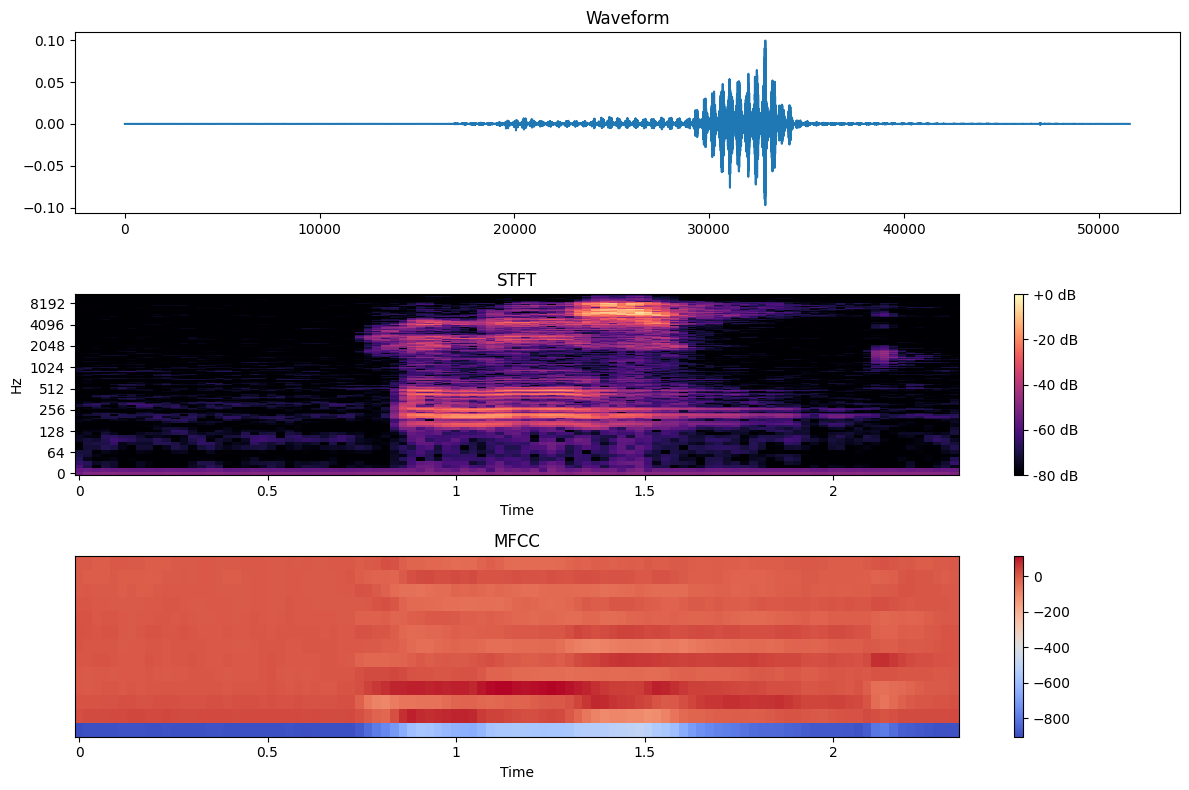

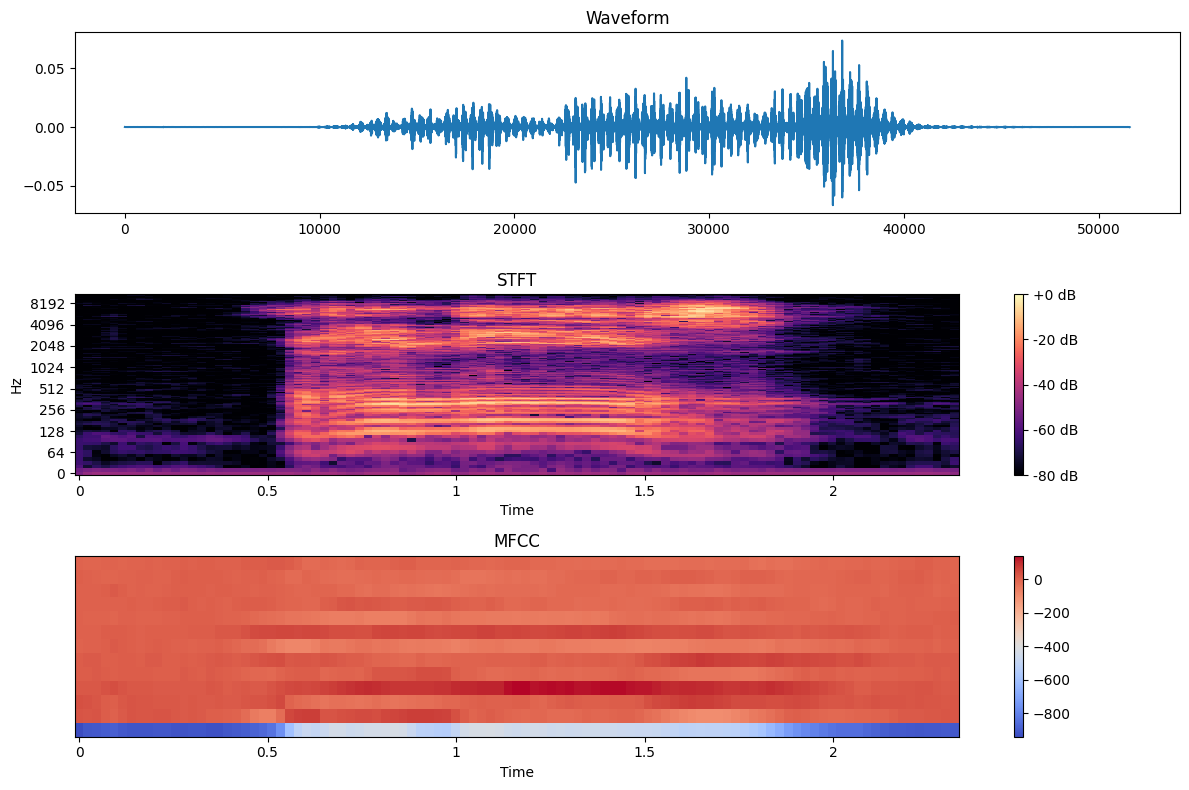

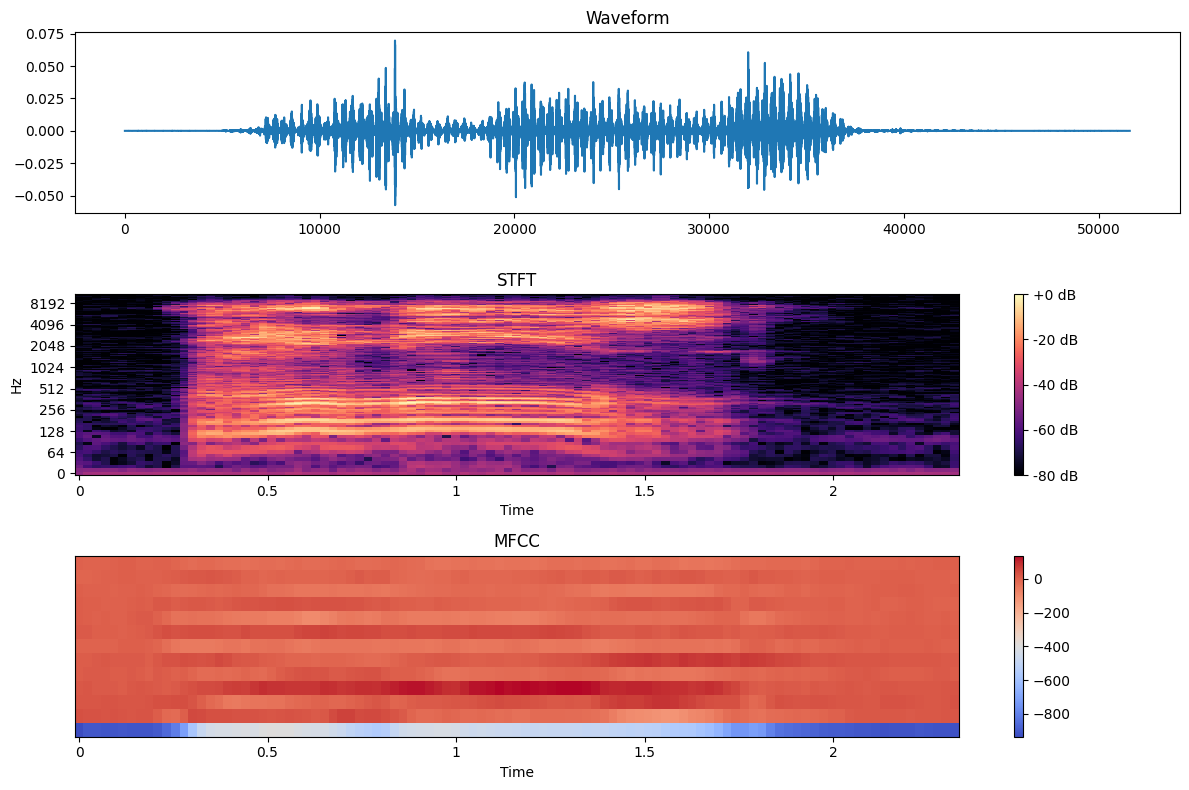

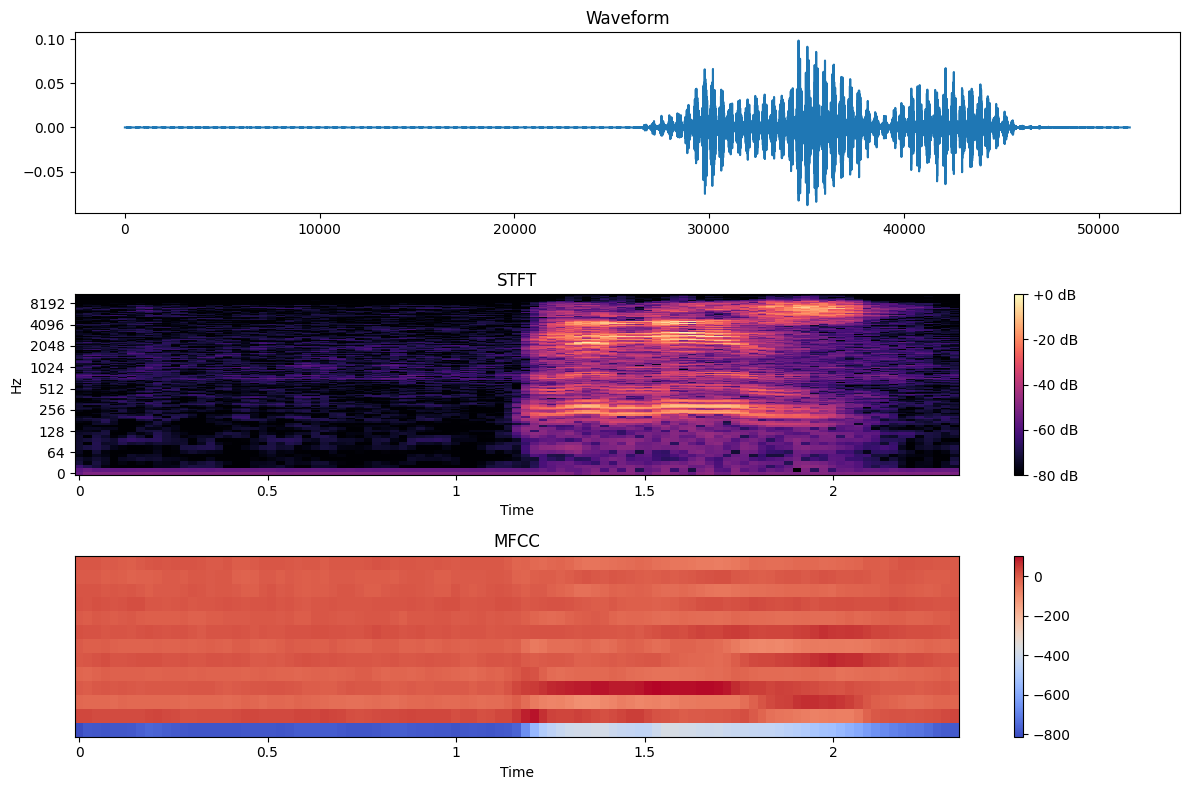

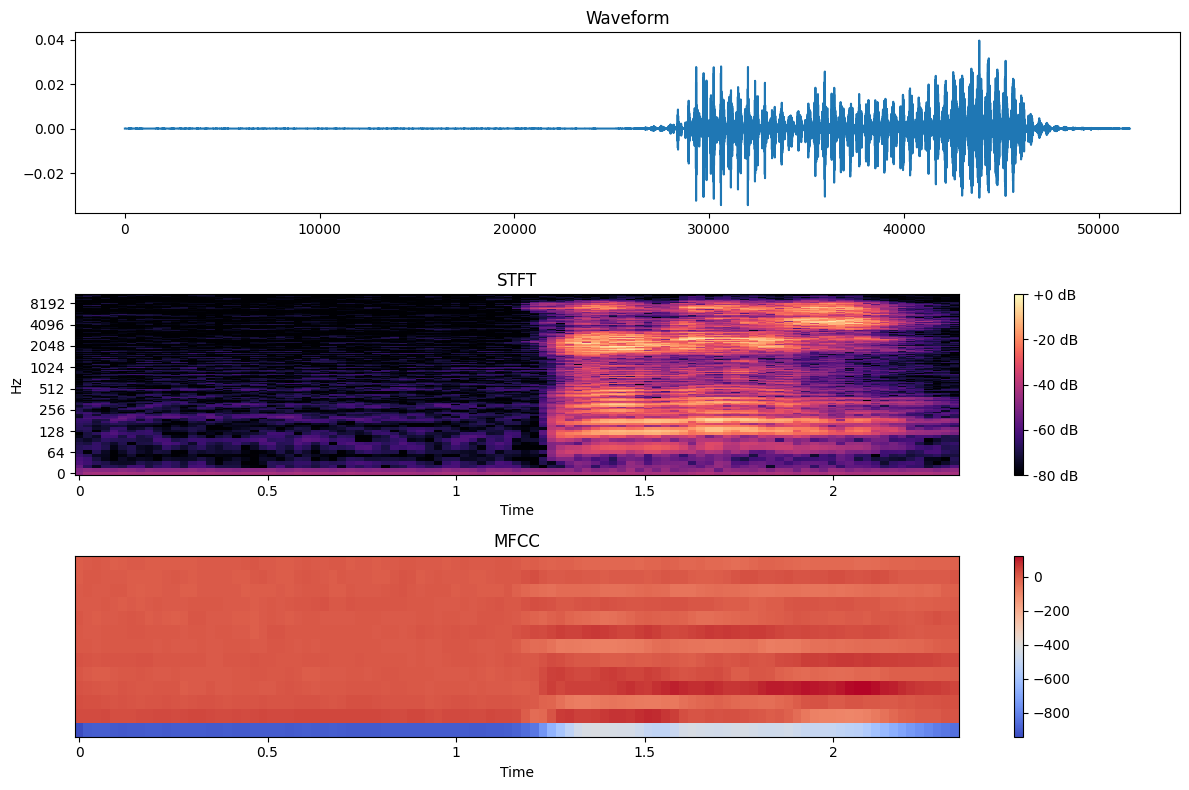

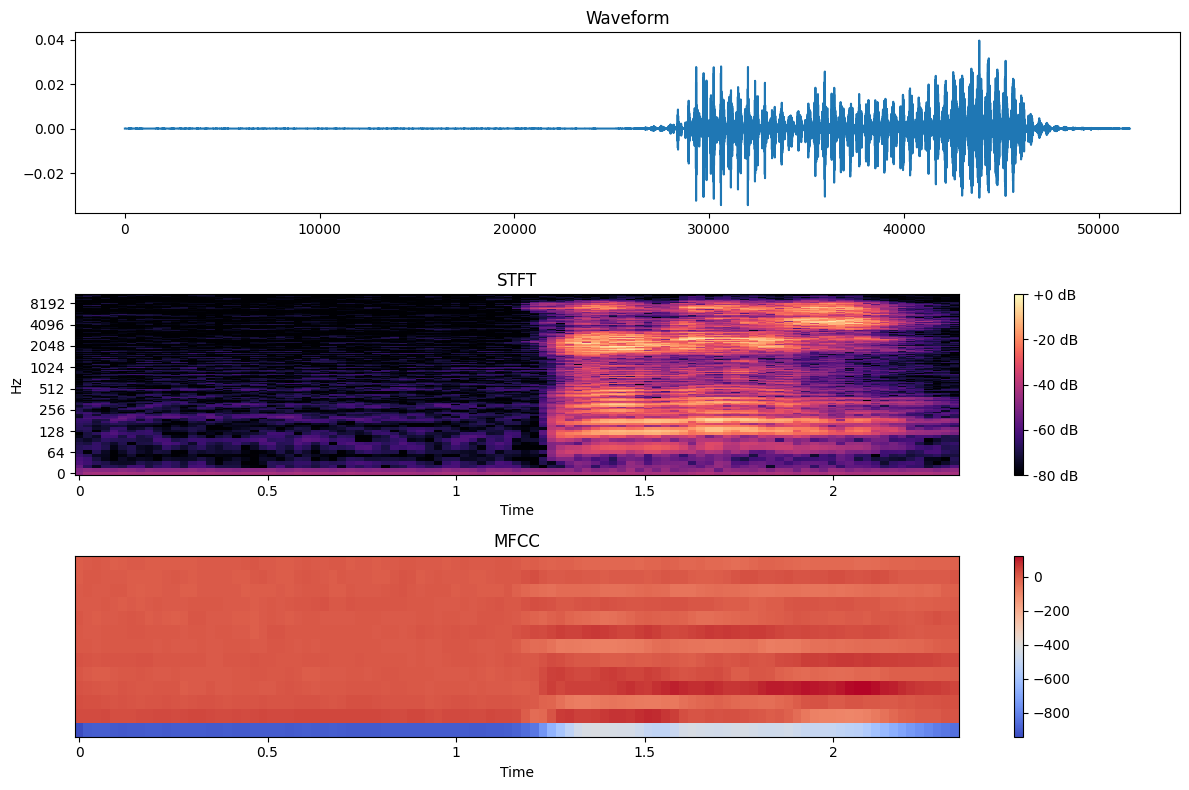

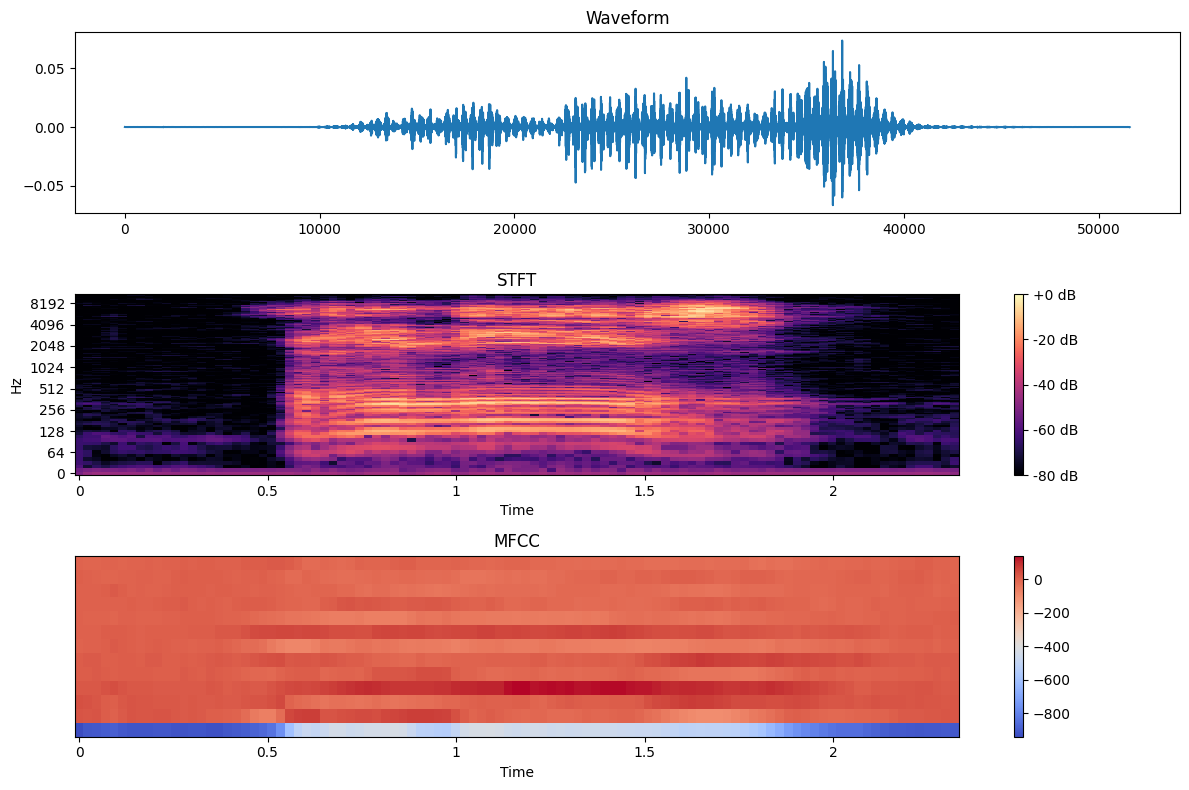

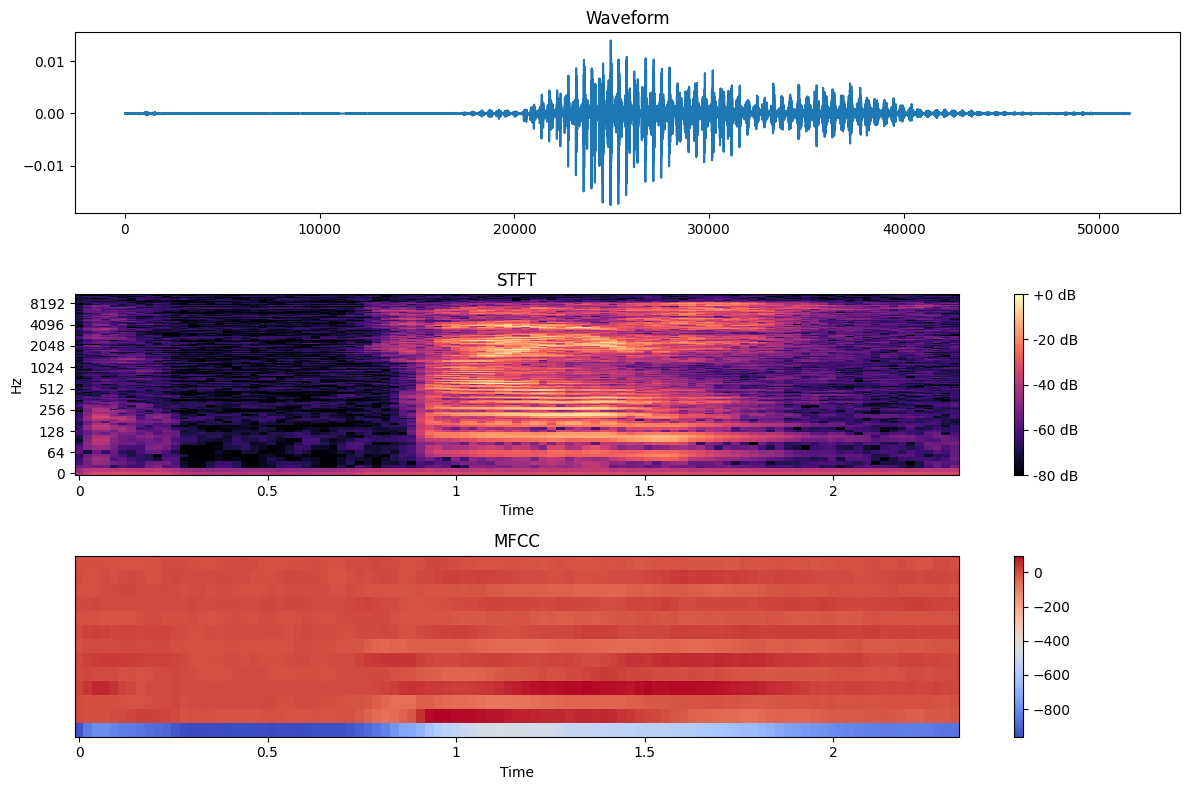

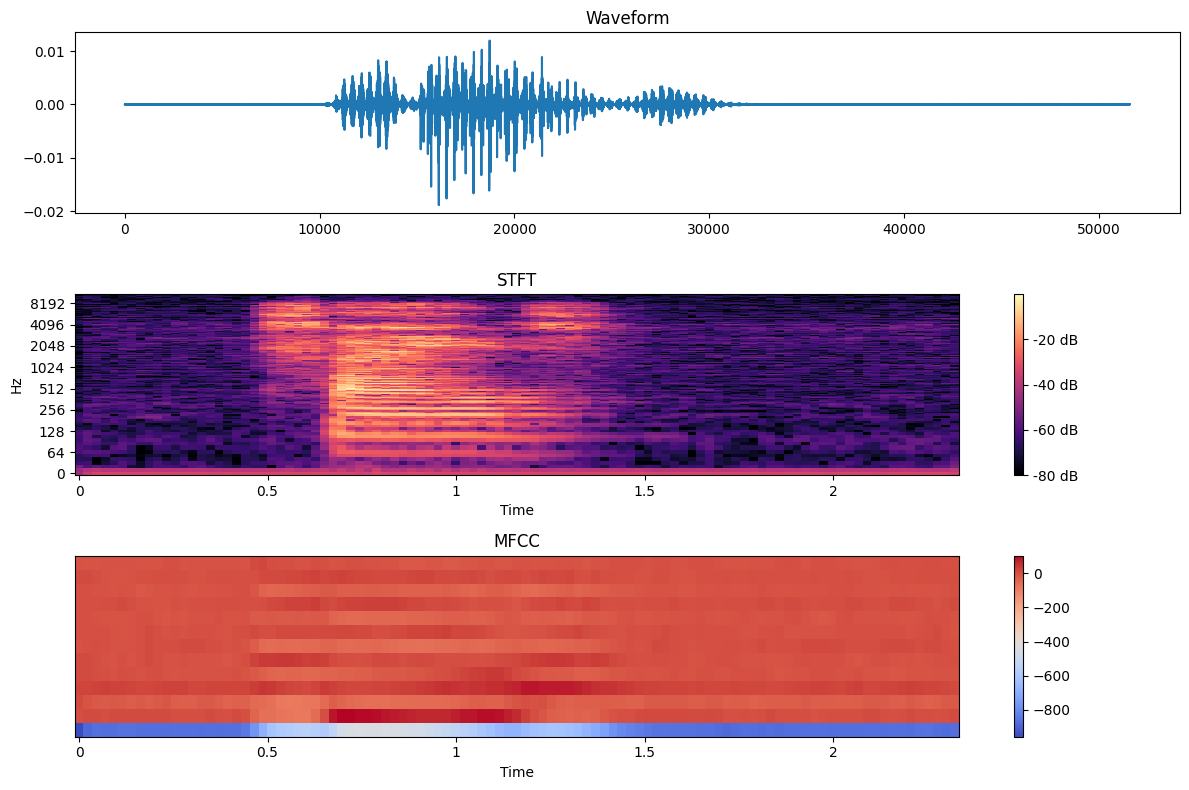

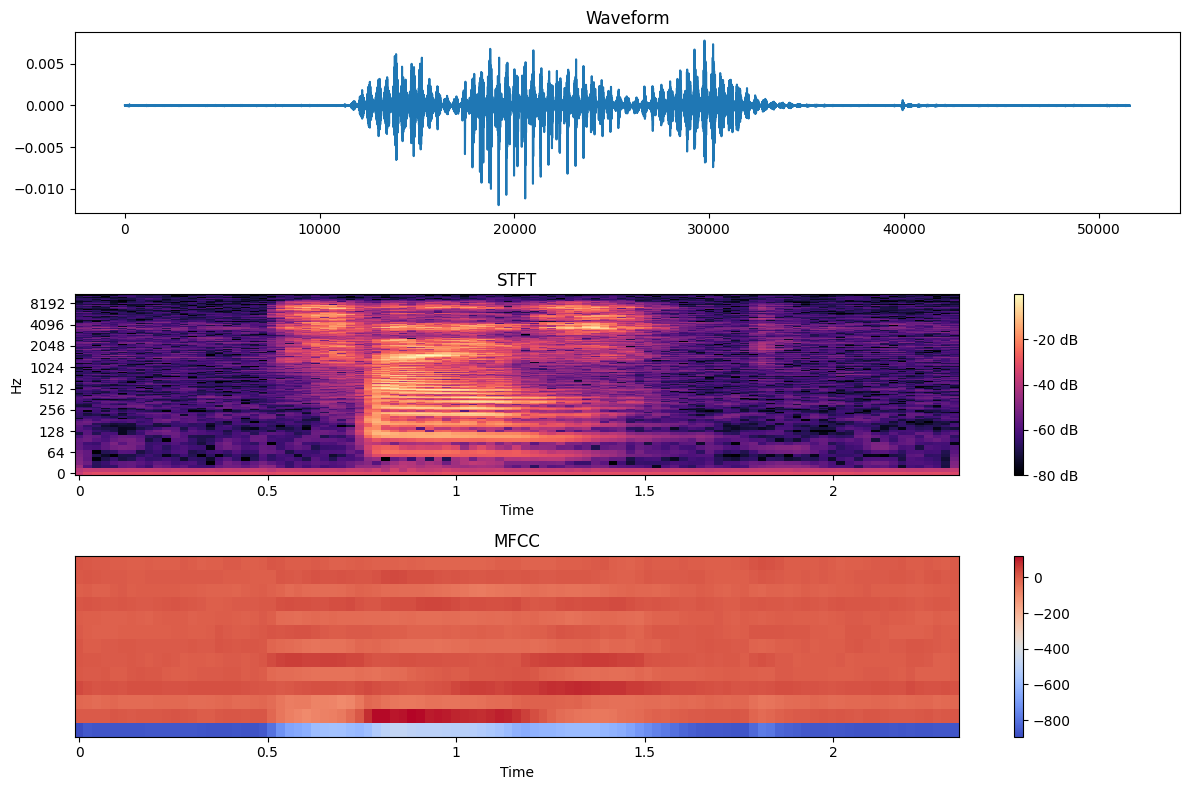

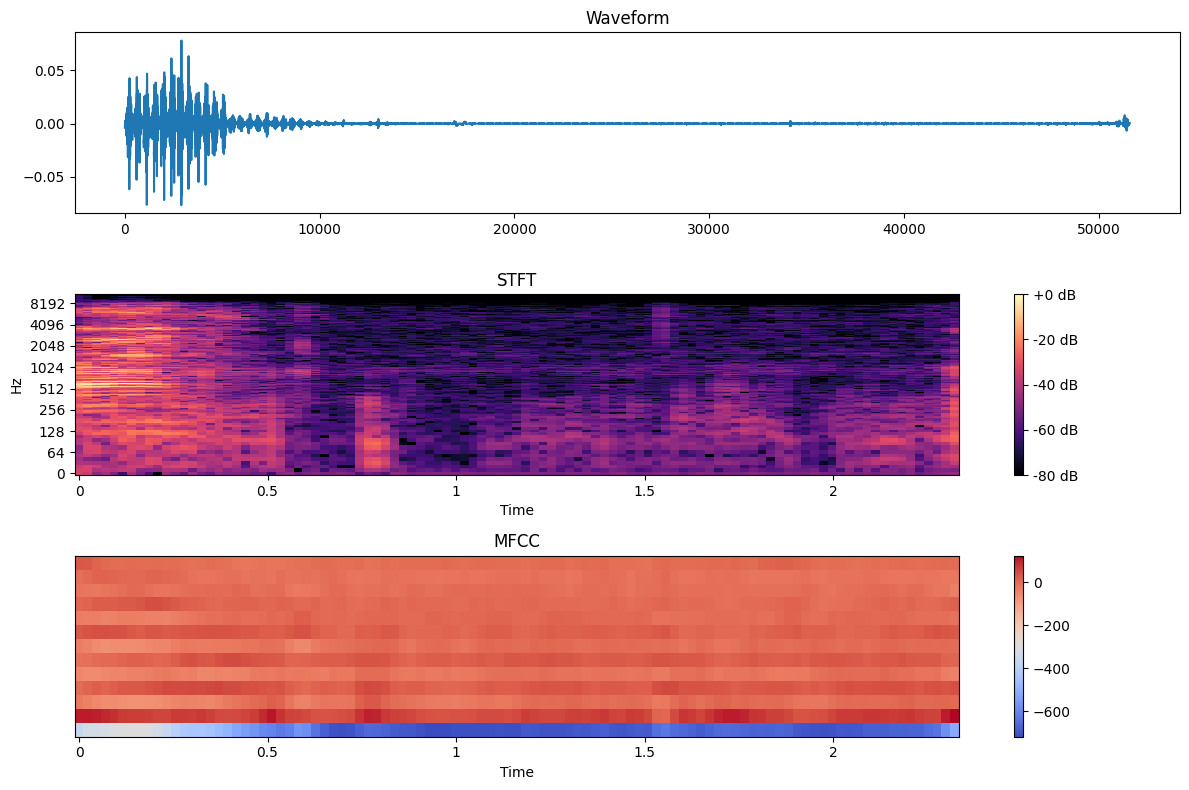

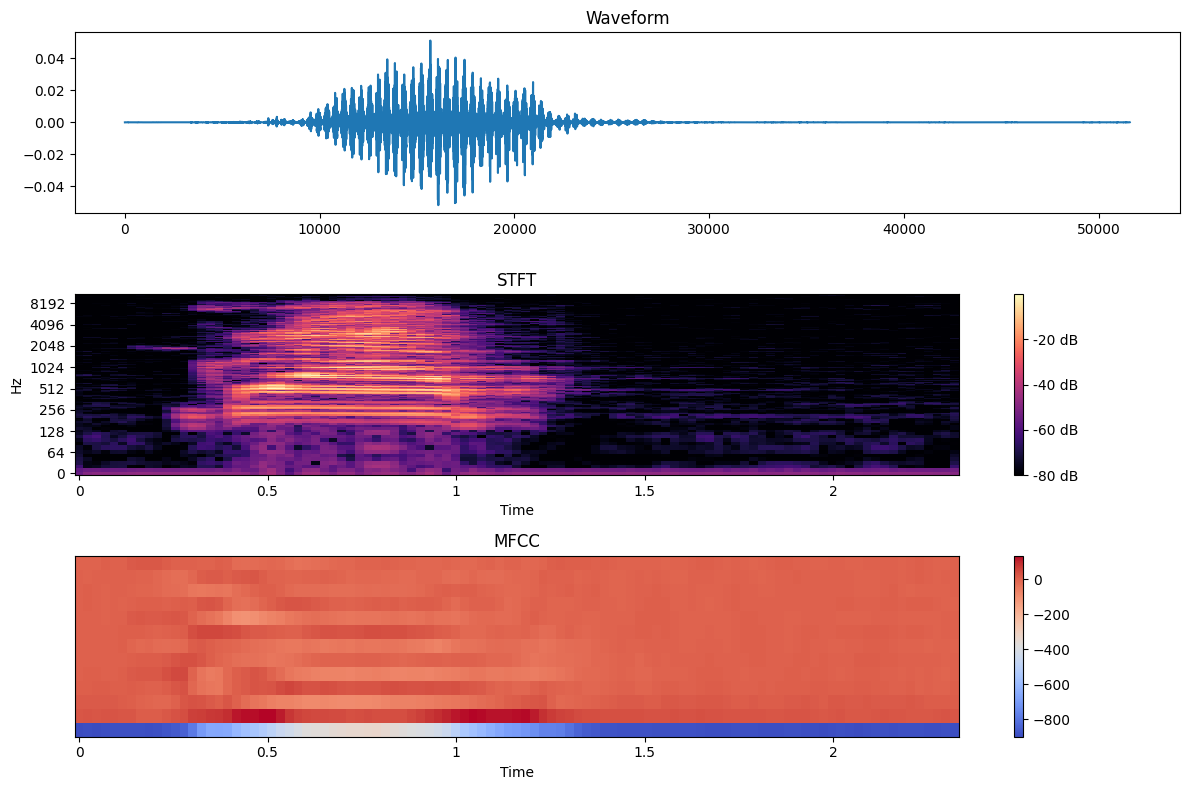

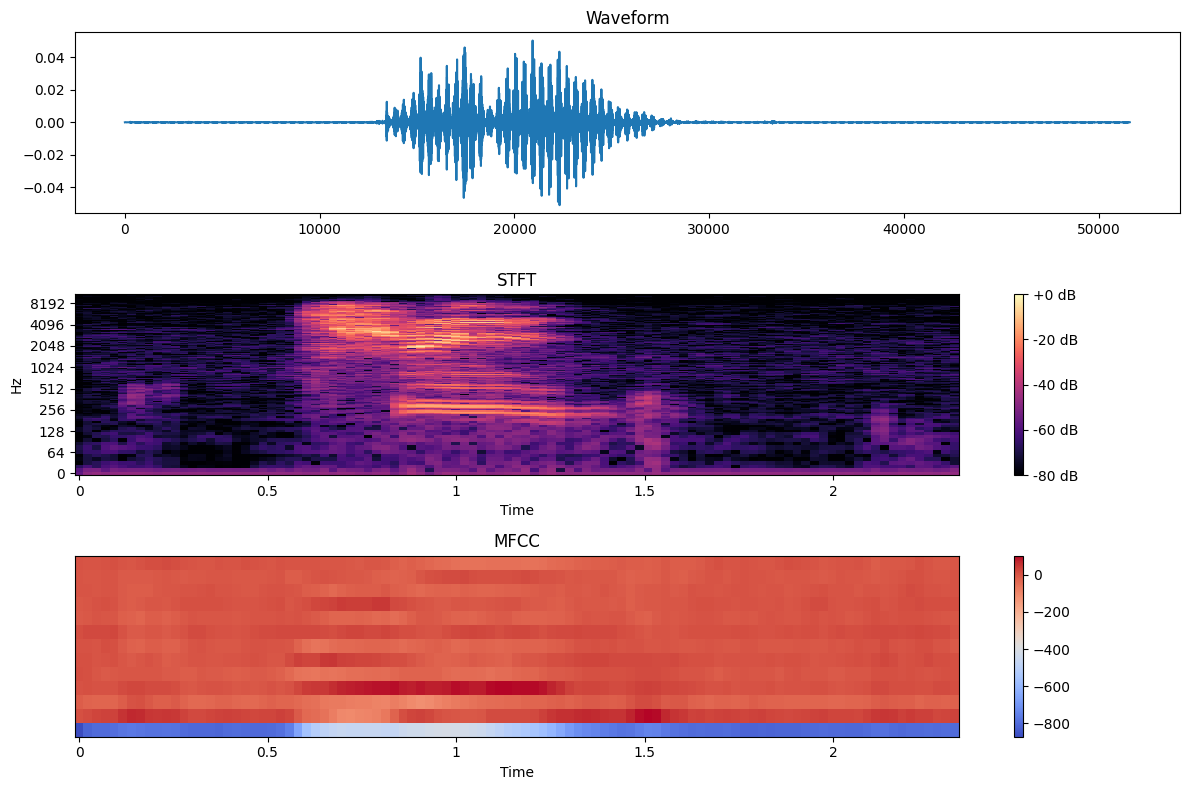

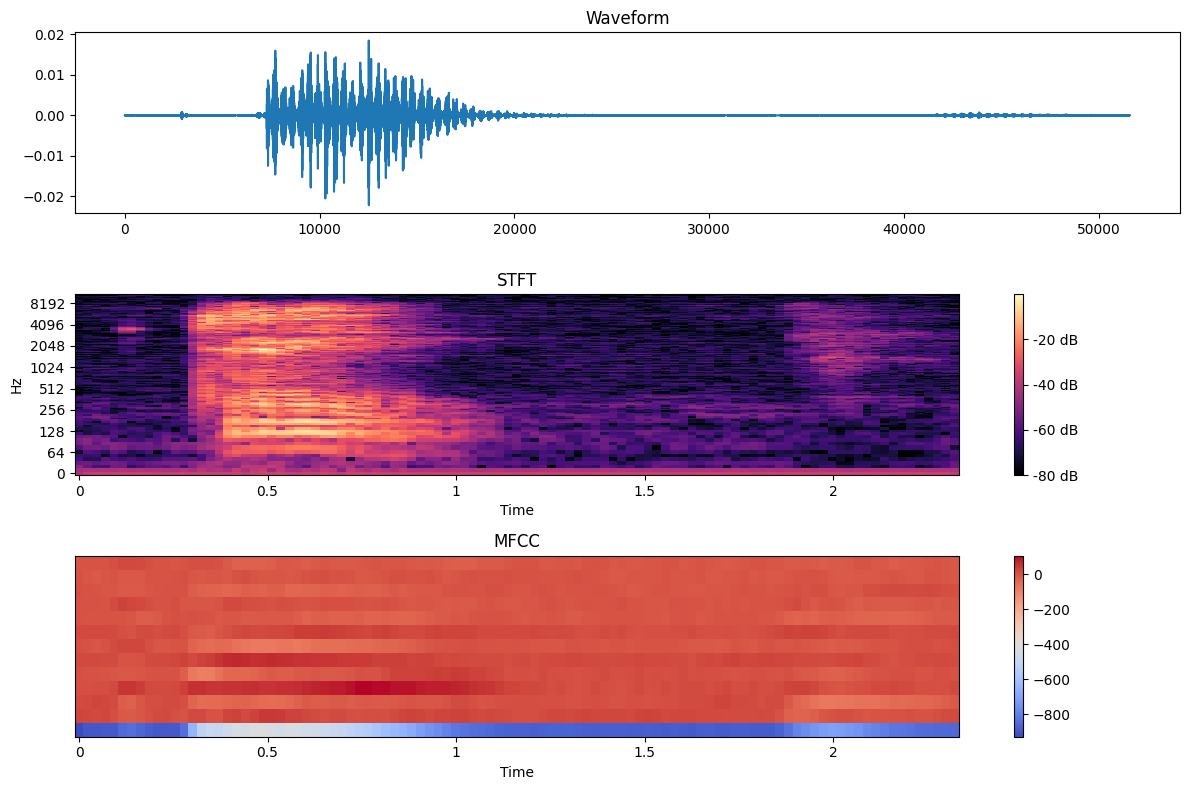

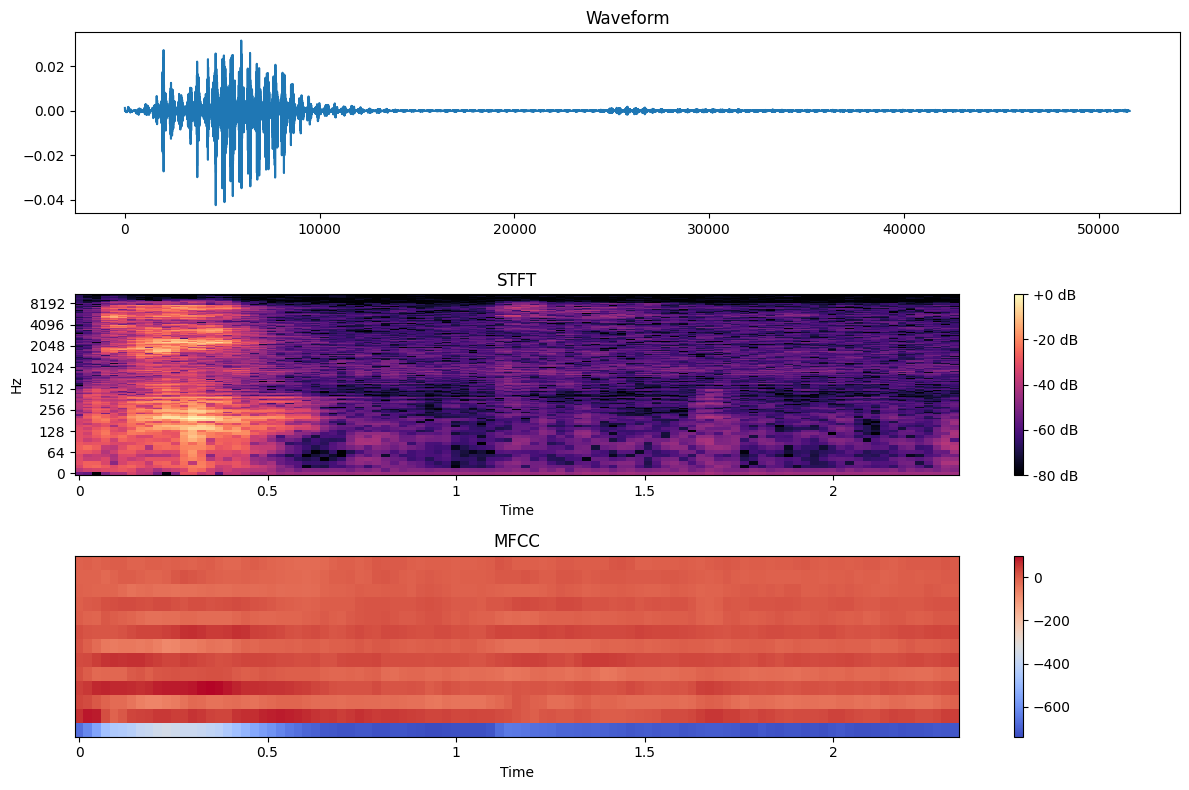

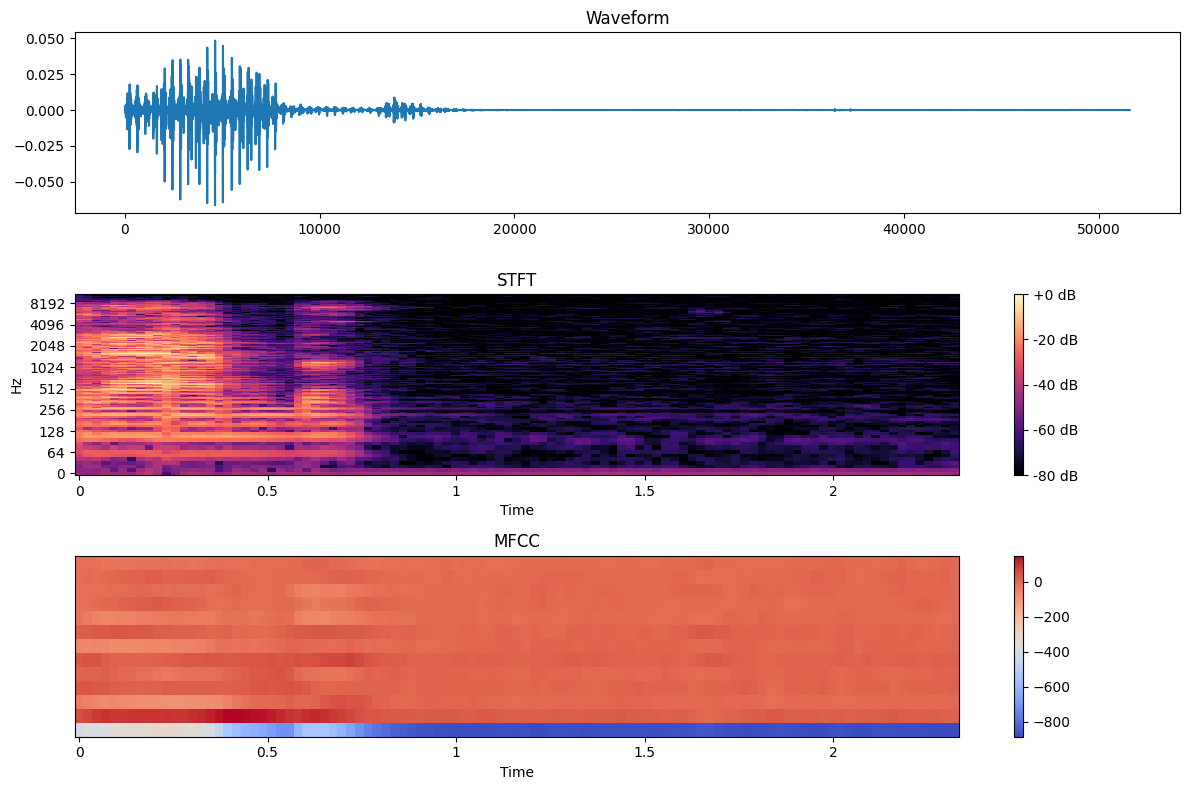

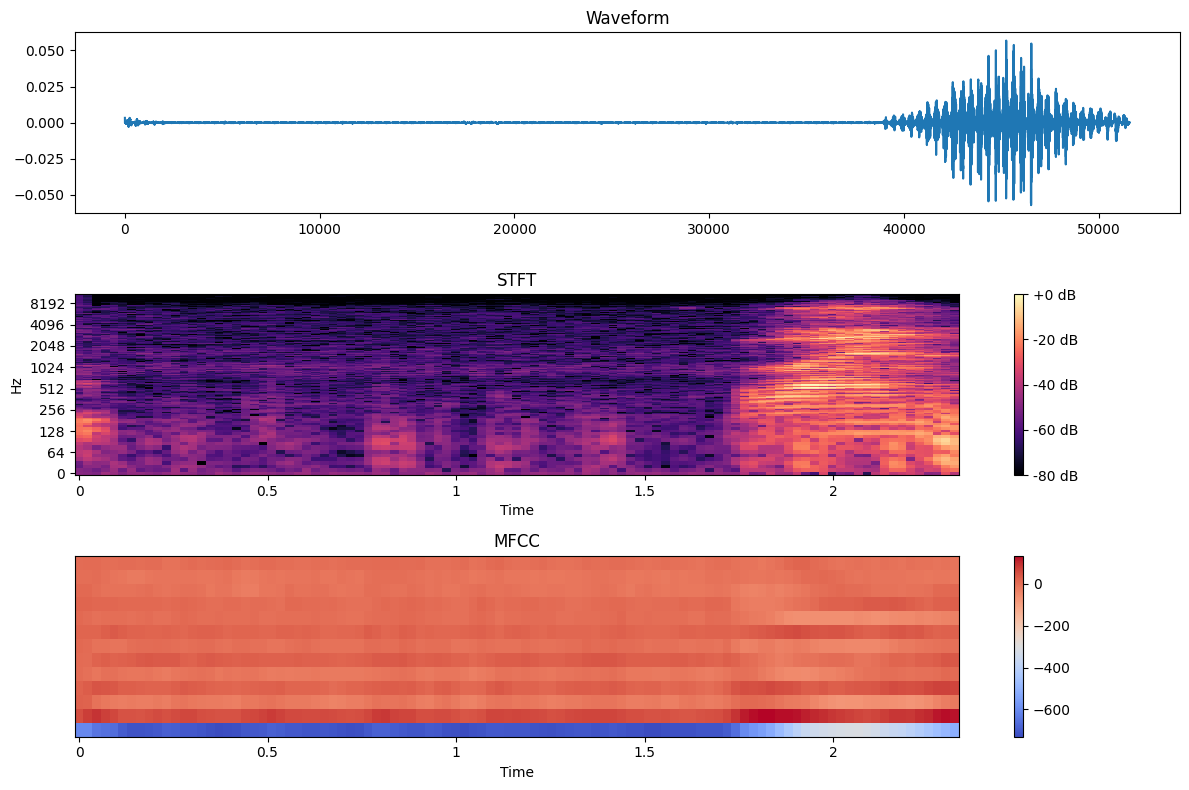

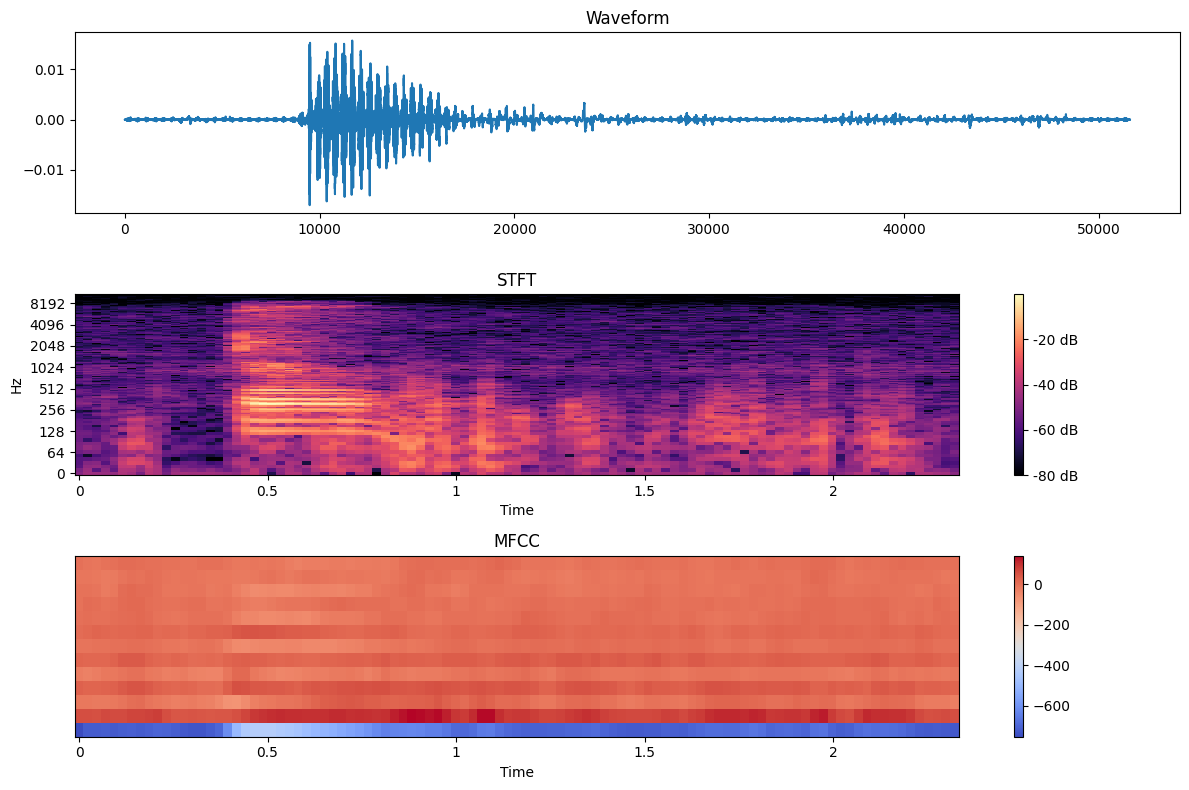

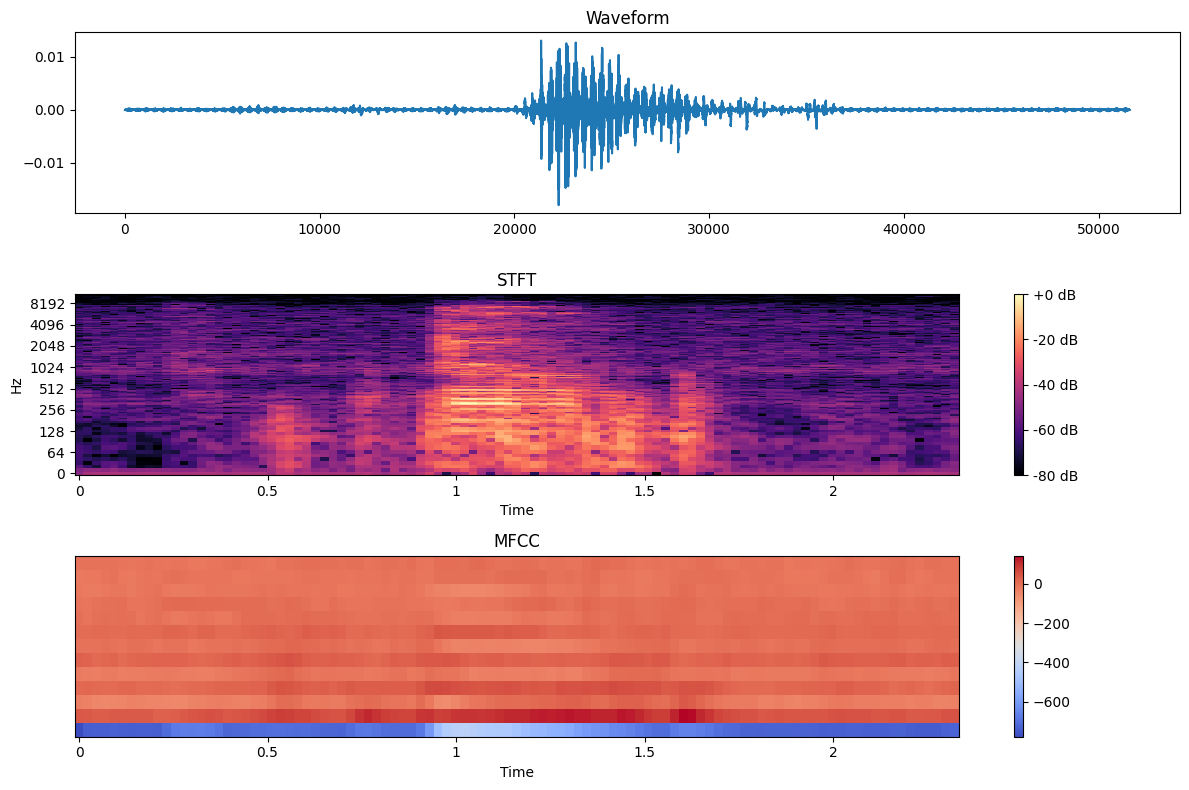

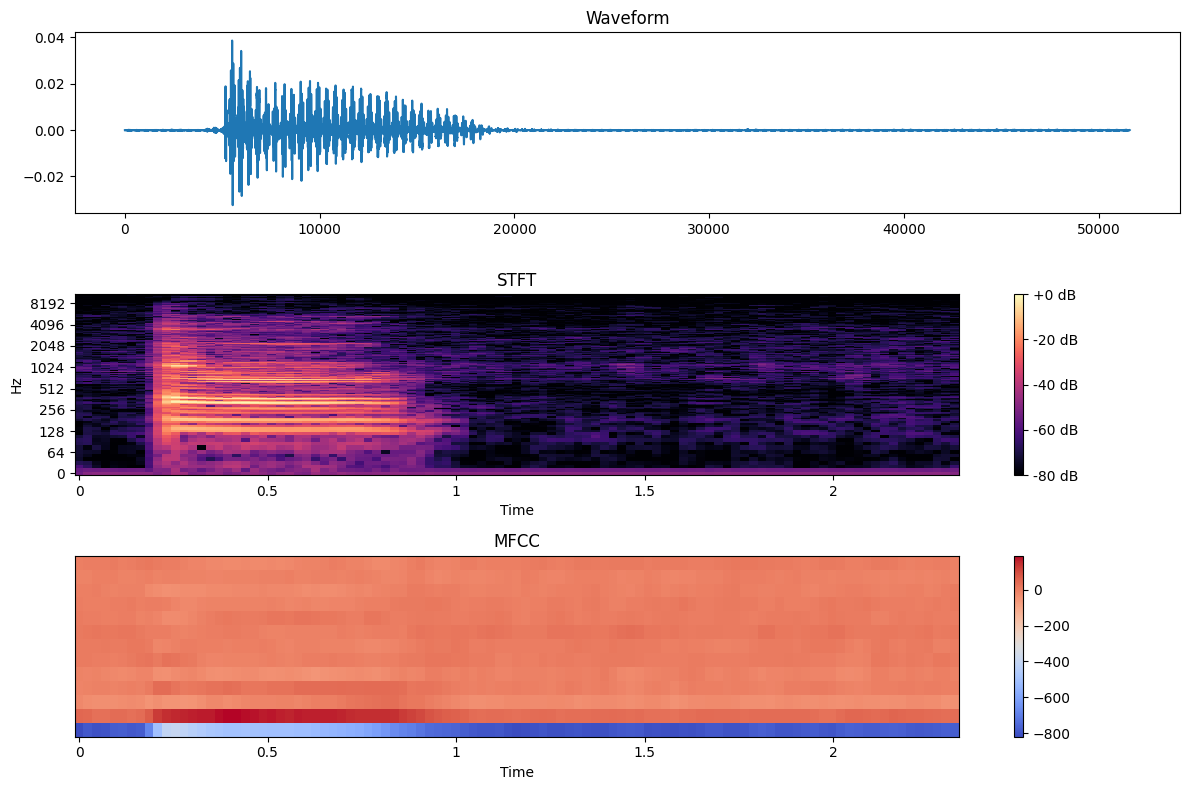

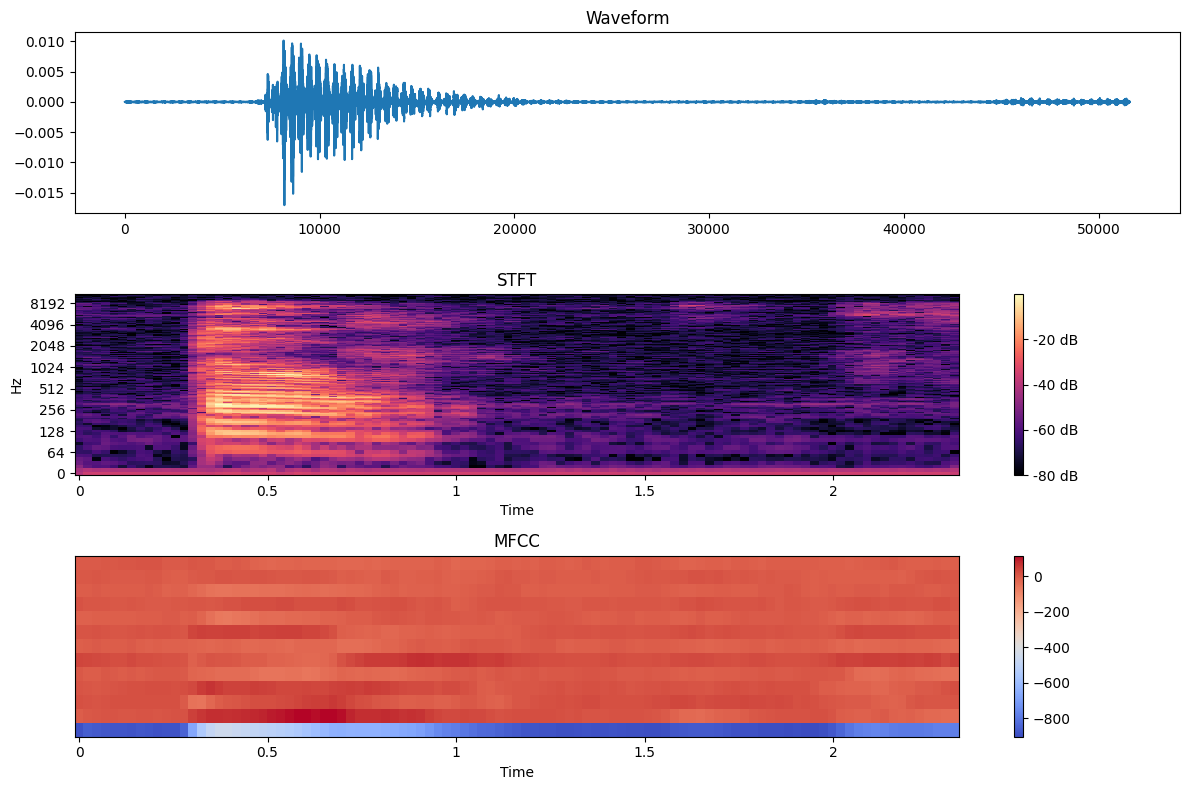

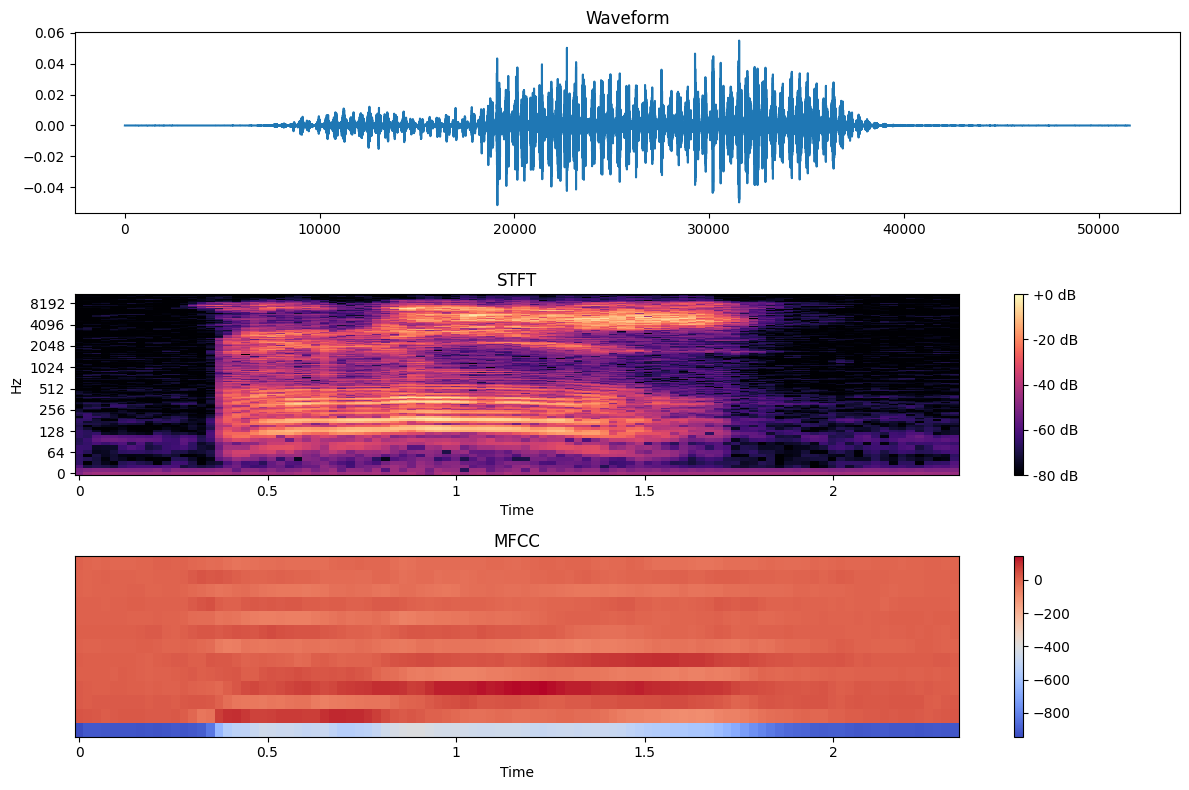

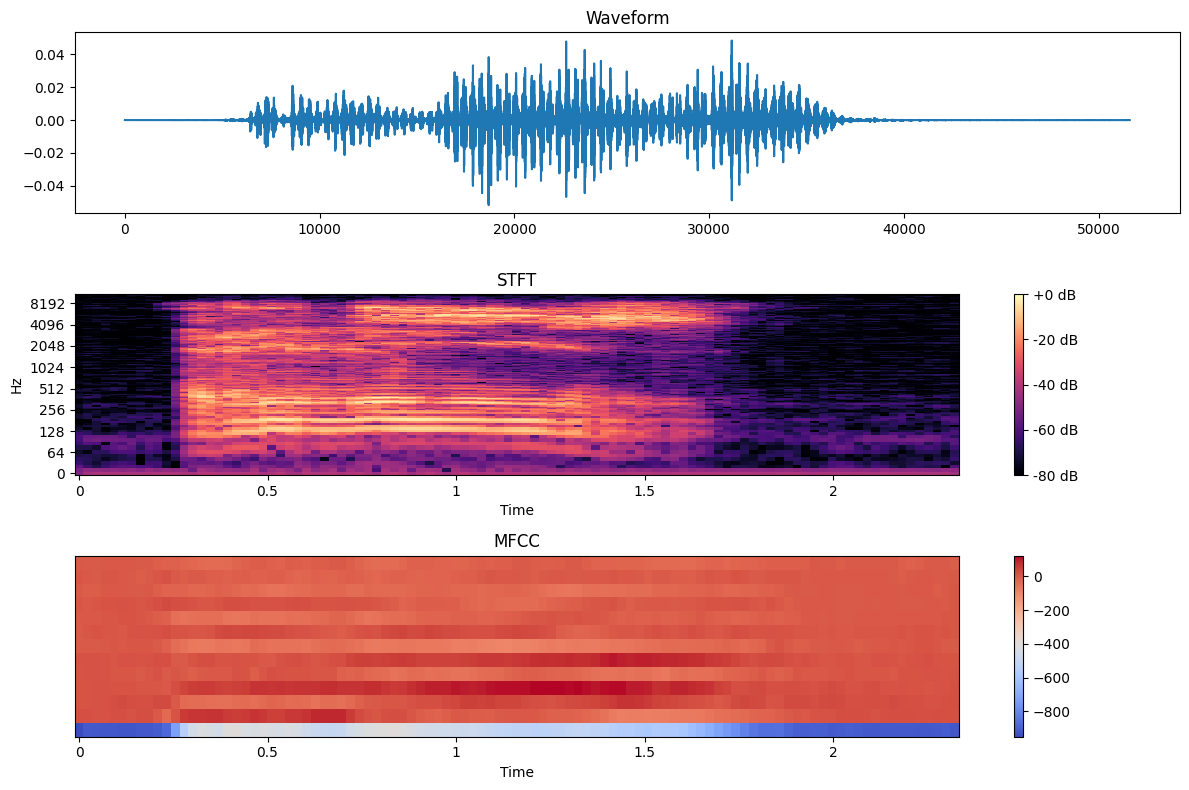

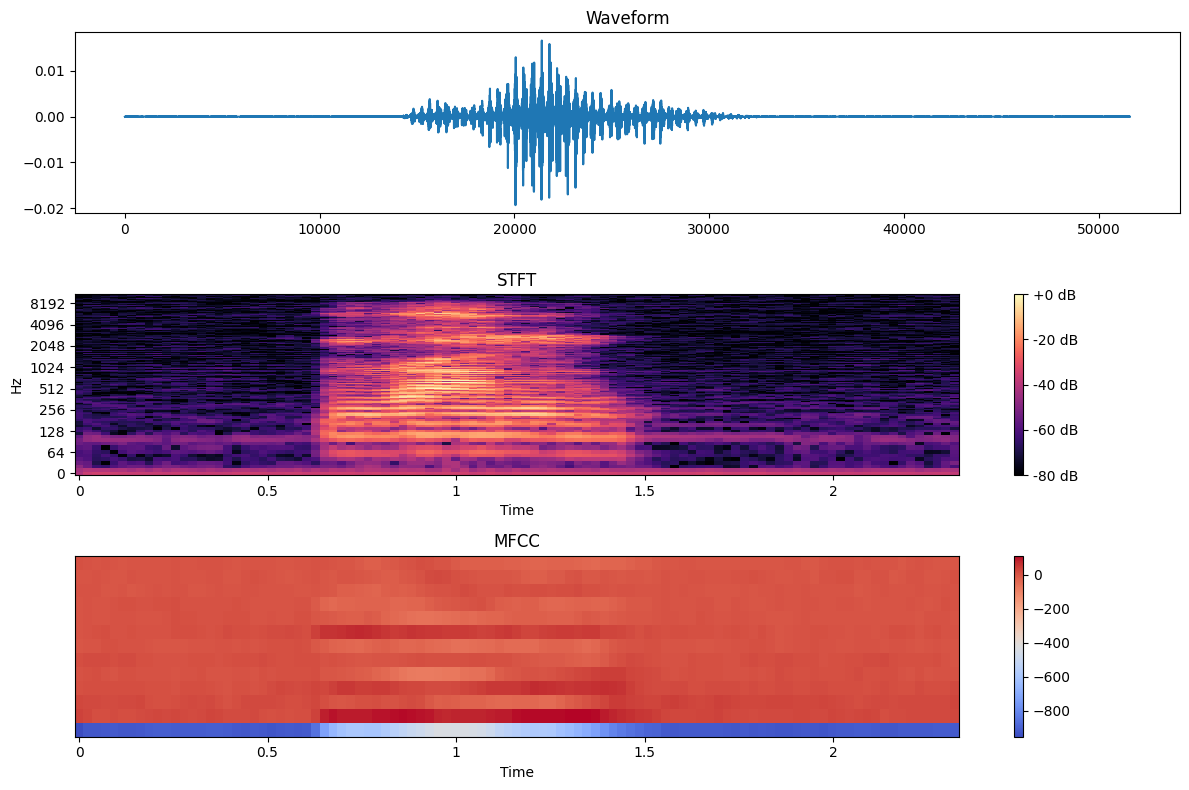

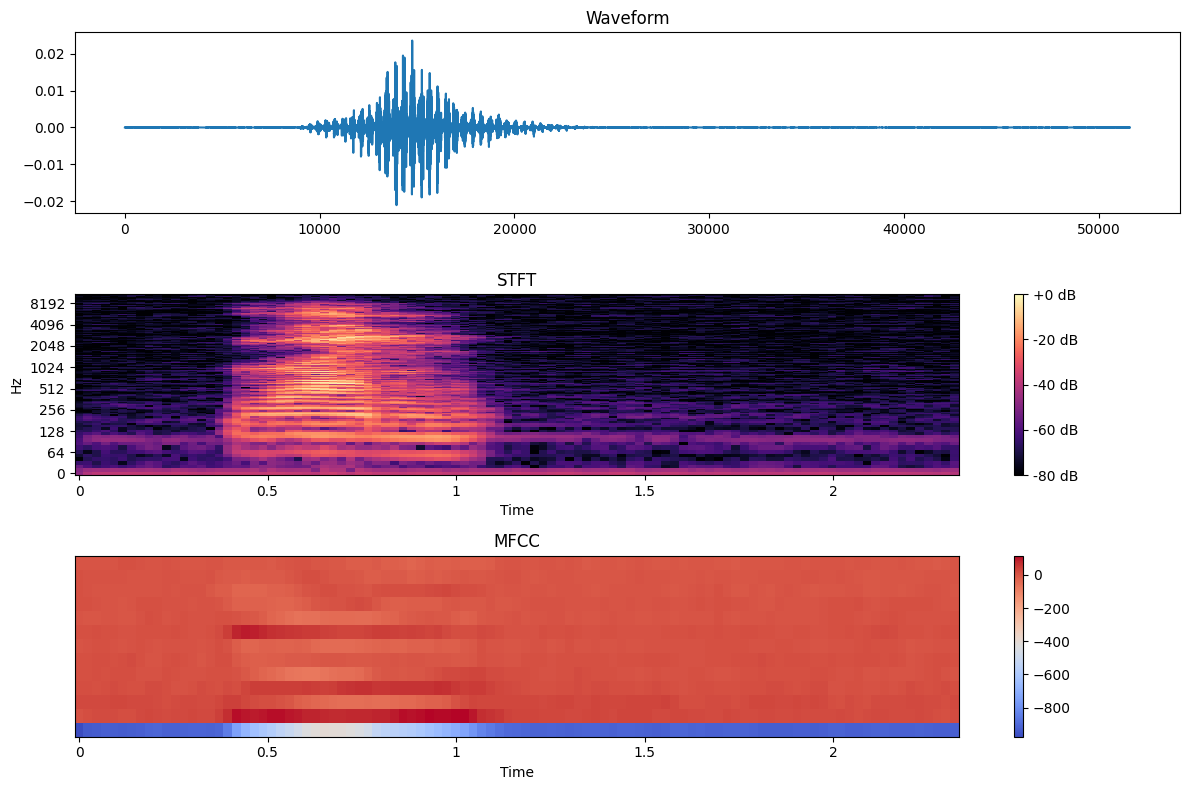

In [ ]:
model= joblib.load('./Trained_Models/Processed/model_Naive_Bayes_Tuning')

file_path = 'C:/AWC_Dataset/audio_files_preprocessed/two/two_11.wav'

class_labels = ["one", "two", "three", "four", "five", "grab", "release"]

feature_vector = extract_features(file_path)

feature_vector = feature_vector.reshape(1, -1)

model_proba = model.predict_proba(feature_vector)
predicted_index = model_proba.argmax()

predicted_label = class_labels[predicted_index]

print(predicted_label)

audio, sr = librosa.load(file_path)

stft = np.abs(librosa.stft(audio))

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(audio)
plt.title('Waveform')

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')

plt.subplot(3, 1, 3)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')

plt.tight_layout()
plt.show()

In [64]:
model_proba

array([[0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        3.17506650e-215, 0.00000000e+000, 0.00000000e+000,
        2.82222669e-147]])